# Étude de la propulsion des bateaux

## Équation différentielle 

$$m\dfrac{dv}{dt} = F_{prop} - F_{fric}$$

Dans le cas de frottements fluides, où un objet se déplace à une vitesse U par rapport au fluide environnant. L'objet peut subir trois différents type de frottements. 

- Le frottements de type Stokes 
- les frottements dit de forme
- et les frottements de peau.

La prédominance des frottements de Stokes ou de forme dépend du nombre de Reynolds 

$$Re = \dfrac{\rho L U}{\eta} = \dfrac{UL}{\nu}$$

- à $Re \ll 1$ Stokes prédomine  $F_{fric} \propto U = \eta L v$

- à $Re$ grand les frottements dit de forme prédominent $F_{fric} \propto U^2 = \frac{1}{2}\rho C_x  S v^2$ avec $C_x\approx 0.01$ (type foil) 

- Dans le cas où l'écoulement laminaire ne s'est pas décollé de la plaque (pas de décollement de couche limite turbulente)  $Re \leq 10^6$, on aurait un frottement de type peau. $F_{fric} \propto v^{3/2} =0.664\rho l\sqrt{\nu L} v^{3/2} = \beta v^{3/2} $. Cela correspond à un régime intermédiaire.


Supposons que la force de propulsion soit simplement une impulsion à t= 0. Le mobile par avec une vitesse non nulle puis décélère à partir de $t=0$

$$m\dfrac{dv}{dt} = - \alpha v^\beta$$


On peut résoudre dans les trois cas l'équation différentielle .

Pour $\beta = 1$, alors $\dfrac{dv}{dt} = - \dfrac{1}{\tau} v$  avec $\tau = \alpha/m$. La solution est de type exponentielle décroissante: 

$$v_{st} = v_0{\rm e}^{-t/\tau}$$

Pour $\beta = 3/2$ alors $\dfrac{dv}{dt} = - \dfrac{1}{\tau} v^{3/2}$ la solution est de la forme :

$$v_{peau} = \dfrac{1}{\left(\dfrac{1}{\sqrt{v_0}} +\dfrac{1}{2\tau}t\right)^2}$$

Pour $\beta = 2$ alors  $\dfrac{dv}{dt} = - \dfrac{1}{\tau} v^{2}$ la solution est de la forme :

$$v_{forme}(t) = \dfrac{1}{\left(\dfrac{1}{v_0} +\dfrac{1}{\tau}t\right)}$$

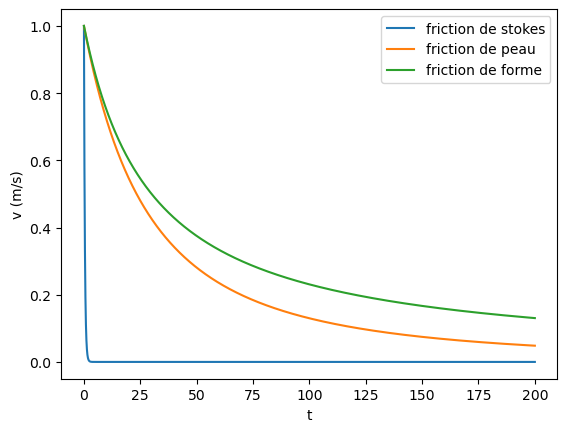

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# paramètres expérimentaux 
m = 0.05e-3;
L = 2e-2;
l = 1.5e-2
eta = 1e-3;
v0 = 1;
rho = 1000;
nu = eta/rho;

beta = 0.664*rho*l*np.sqrt(nu*L);

v0 = 1 # m/s
tau = 1 # s
def vst(t):
    tau = eta*L/m
    return v0*np.exp(-t/tau)

def vpeau(t):
    beta = 0.664*rho*l*np.sqrt(nu*L);
    tau = beta/m
    return 1/(1/np.sqrt(v0)+t/2/tau)**2

def vform(t):
    Cx = 0.01
    S = L*l
    tau = .5*Cx*S*rho/m
    return  1/(1/v0+1/tau*t)

t=np.linspace(0,200,10000)
plt.figure()
plt.plot(t, vst(t), label = 'friction de stokes')
plt.plot(t, vpeau(t), label = 'friction de peau')
plt.plot(t, vform(t), label = 'friction de forme')
plt.xlabel('t')
plt.ylabel('v (m/s)')
plt.legend()

## 

Supposons que c'est bien un frottement de type peau qui gouverne la dissipation de la quantité de mouvement du bateau ($Re\approx 10^3$)

Dans ce cas l'équation s'écrit : 

$$m\dfrac{dv}{dt} = F_{prop} - \beta v^{3/2}$$

Il ne reste plus qu'à identifier la force de propulsion. 

C'est la tension de surface qui est modifiée à l'arrière du bateau. On a donc une différence de force capillaire entre l'avant et l'arrière du bateau 

$$F_{prop} = L\Delta\gamma$$

La difficulté du probèleme réside dans l'écriture de $\Delta\gamma$ en fonction de la nature du tensioactif, de sa concentration et de la dynamique d'étalement du tensiaoctif au cours du temps.

On peut cependant faire une étude de la vitesse initiale du bateau. Qui va dépendre de la balance entre la propulsion et les forces de frottements fluide 

$$F = \beta v^{3/2} \Rightarrow v_0 = \left(\frac{F}{\beta}\right)^{2/3}=\left(\dfrac{L\Delta\gamma}{\beta}\right)^{2/3}$$

On peut alors réaliser l'étude expérimentale présenté dans le dossier